In [26]:
β = 0.996
ρ = 0.949
σe = 0.0065
σ = 0.034
χ = 0.49
b = 0.4
γ = 0.72
η = 0.72
z_bar = 1

ϕ1 = (1-σ - γ*χ)/(1-γ)/χ
ϕ2 = (1-γ)*β*χ
k = (z_bar-b)*ϕ2/(1-ϕ1*ϕ2)
A = η*k/((1-γ)*β*χ)
B = (β*A*(1-σ)-γ*k/(1-γ))
C = ρ/(A - B * ρ)

print(k," ", C)


0.21063617268777504 1.55448333116795

In [57]:
using Random, Distributions

zhat_path = ones(5001)
z_path = ones(5001)

θhat_path = ones(5001)
u_path = ones(5001)
v_path = ones(5001)
e = Normal(0, σe)
for t in 1:1:5000
    zhat_path[t+1] = ρ*zhat_path[t] + rand(Normal(0, σe), 1)[1]
    θhat_path[t] = C*zhat_path[t]
    θ_path[t] = 1*exp(θhat_path[t])
    z_path[t] = 1*exp(zhat_path[t])
    u_path[t+1] = σ + u_path[t+1]*(1-σ+χ*θ_path[t]^(1-η))
    v_path[t] = θ_path[t]*u_path[t] 
end

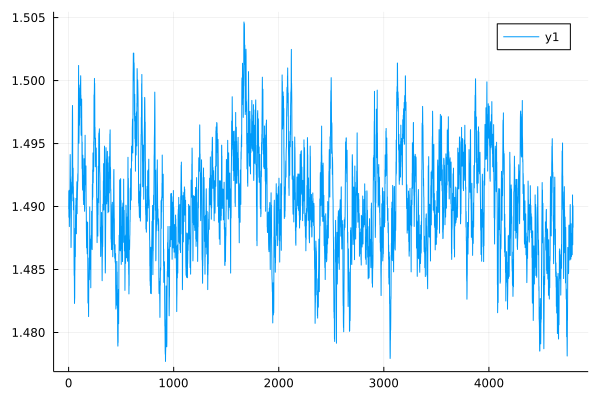

In [58]:
using Plots
plot(u_path[200:5000])

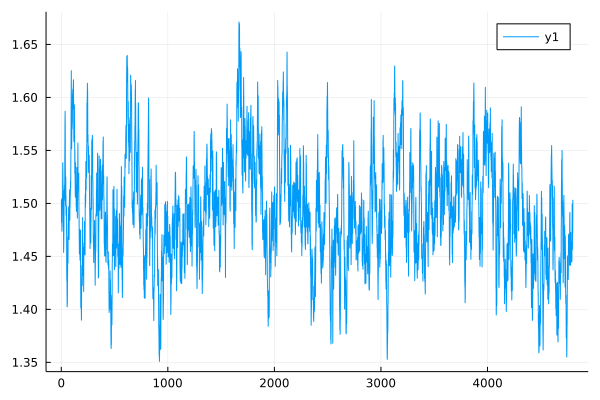

In [59]:
using Plots
plot(v_path[200:5000])